**CONVOLUTIONAL NEURAL NETWORK : BUILD AND TRAIN TO CLASSIFY IMMAGES BW DOGS AND CATS.**

CNN PROJECT USING KERAS WITH TENSORFLOW TO CLASIFY DOG VS CAT SYSTEM.

In [ ]:
from google.colab import drive
from zipfile import ZipFile
import os

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Specify the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/dog_cat_images.zip'

# Specify the directory to extract the contents
extracted_images_directory = '/content/extracted_images_directory'

# Create the directory if it doesn't exist
os.makedirs(extracted_images_directory, exist_ok=True)

# Extract the contents of the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_images_directory)

# List the files in the extracted directory
image_files = os.listdir(extracted_images_directory)
print("List of extracted image files:", image_files)

# notice that, 'dog_cat_images.zip' file ke andar images direct nhi hain, ve train name ke ek anya directory ke andar hain. So extracted images files me train directry will be displayed
# don't be confused with this train and model training vala train. Durbhagya se train name ki directory me all images hain.

List of extracted image files: ['train']


In [ ]:
import glob # Used for pattern matching and retrieving file paths.
import random # Used for random sampling of files.
import shutil # Used for file operations, such as moving files.
import os # Used for changing the current working directory and creating directories.

# Change the working directory to where the images are located
os.chdir('/content/extracted_images_directory/train')

# Create directories if they don't exist, but not in pwd, direct content me create karenge : absolute path se
os.makedirs('/content/dog-vs-cats/train/cat', exist_ok=True)
os.makedirs('/content/dog-vs-cats/train/dog', exist_ok=True)
os.makedirs('/content/dog-vs-cats/valid/cat', exist_ok=True)
os.makedirs('/content/dog-vs-cats/valid/dog', exist_ok=True)
os.makedirs('/content/dog-vs-cats/test/cat', exist_ok=True)
os.makedirs('/content/dog-vs-cats/test/dog', exist_ok=True)

# Move 500 random cat images from pwd to the '/content/dog-vs-cats/train/cat' directory
for cat_image in random.sample(glob.glob('cat*'), 500):
    shutil.move(cat_image, '/content/dog-vs-cats/train/cat')

# Move 500 dog random images from pwd to the '/content/dog-vs-cats/train/dog' directory
for dog_image in random.sample(glob.glob('dog*'), 500):
    shutil.move(dog_image, '/content/dog-vs-cats/train/dog')

# Move 100 cat random images from pwd to the '/content/dog-vs-cats/valid/cat' directory
for cat_image in random.sample(glob.glob('cat*'), 100):
    shutil.move(cat_image, '/content/dog-vs-cats/valid/cat')

# Move 100 dog random images from pwd to the '/content/dog-vs-cats/valid/dog' directory
for dog_image in random.sample(glob.glob('dog*'), 100):
    shutil.move(dog_image, '/content/dog-vs-cats/valid/dog')

# Move 50 cat random images from pwd to the '/content/dog-vs-cats/test/cat' directory
for cat_image in random.sample(glob.glob('cat*'), 50):
    shutil.move(cat_image, '/content/dog-vs-cats/test/cat')

# Move 50 dog randm images from pwd to the '/content/dog-vs-cats/test/dog' directory
for dog_image in random.sample(glob.glob('dog*'), 50):
    shutil.move(dog_image, '/content/dog-vs-cats/test/dog')

# remember we are moving, so ek bar jo chala gya, dobara vo kisi dusre directory me nhi ja skta since, ab vo pwd se delete ho chuka hai

We are going to working with subset of 25000 images in which total 1000 training images, 200 validation images and 100 test images in equal proportion of all the classes.

In [ ]:
!pwd

/content/extracted_images_directory/train


In [ ]:
os.chdir('../../') # change directory to initial place

In [ ]:
!pwd

/content


In [ ]:
train_path = '/content/dog-vs-cats/train'
valid_path = '/content/dog-vs-cats/valid'
test_path = '/content/dog-vs-cats/test'

# 3 variables jisme train, valid and test datasets ke path ko assign kiya

Whenever we train a model, we need the data in a formate the model expects. We are going to put our images in formate called keras generator.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # used for data argumentation and creating batches of preprocessed images from the data directory.
import tensorflow as tf

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Certainly! The provided code is using the Keras `ImageDataGenerator` class to generate batches of images from directories. Here's an explanation of the code:

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Create ImageDataGenerators for training, validation, and testing
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=test_batches_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)
```

Explanation:

1. **Imported Modules:**
   - `tensorflow.keras.preprocessing.image.ImageDataGenerator`: This module is used for real-time data augmentation during training and generating batches of images.

2. **Image Data Generators:**
   - `ImageDataGenerator`: This class generates batches of tensor image data with real-time data augmentation. It can be configured to preprocess the input images.

3. **`flow_from_directory` Method:**
   - `flow_from_directory` is a method of the `ImageDataGenerator` class that generates batches of data from a directory. It is commonly used for image classification tasks.
   - `directory`: Specifies the path to the target directory. Images will be read from this directory.
   - `target_size`: Sets the size to which all images will be resized during the data loading process.
   - `classes`: Specifies the class subdirectories. In this case, it's ['cat', 'dog'].
   - `batch_size`: Sets the size of the batches of data.
   - `shuffle`: Specifies whether to shuffle the data. It's set to `False` for the test_batches, as you typically don't shuffle test data.

These generators are often used in combination with neural network models to train, validate, and test models on image datasets. The `preprocessing_function` parameter is used to apply the VGG16 model-specific preprocessing to the images. Means famous model vgg16 me jo preprocessing ki gyi thi, same preprocessing in rase images pr bhi kr di jayengi.

In [ ]:
# varification of the above step ki sahi variable me sahi images aayin ki nhi
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

Koi bhi pair mismatch hota tho, ye assertion error de deta. No error = images ka division correctly hua.

Certainly! The provided code is performing verification checks to ensure that the generated batches of images have the expected characteristics. Here's an explanation of each line:

```python
# Verify that the number of samples (n) in each batch is as expected
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
```

Explanation:
- `train_batches.n == 1000`: Verifies that the training batch has 1000 samples.
- `valid_batches.n == 200`: Verifies that the validation batch has 200 samples.
- `test_batches.n == 100`: Verifies that the test batch has 100 samples.

```python
# Verify that the number of classes in each batch is as expected
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2
```

Explanation:
- `train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2`: Verifies that the number of classes (categories) in each batch is 2. This is consistent with the binary classification problem where the images are categorized into two classes ('cat' and 'dog').

The `assert` statements are used for debugging and testing purposes. If any of the conditions is not met during the execution of the code, an `AssertionError` will be raised, indicating that there might be an issue with the data generation or batch characteristics. If all assertions pass without raising an error, it confirms that the batches have been generated correctly with the expected number of samples and classes.

In [ ]:
train_batches

In [ ]:
train_batches[0]

(array([[[[ 8.3060997e+01,  4.9221001e+01,  2.0320000e+01],
          [ 7.9060997e+01,  4.5221001e+01,  1.6320000e+01],
          [ 8.5060997e+01,  5.1221001e+01,  2.2320000e+01],
          ...,
          [ 9.0060997e+01,  4.4221001e+01,  1.7320000e+01],
          [ 9.1060997e+01,  4.7221001e+01,  1.7320000e+01],
          [ 9.3060997e+01,  4.9221001e+01,  1.9320000e+01]],
 
         [[ 9.0060997e+01,  4.5221001e+01,  1.9320000e+01],
          [ 9.1060997e+01,  4.8221001e+01,  2.2320000e+01],
          [ 9.1060997e+01,  4.8221001e+01,  2.2320000e+01],
          ...,
          [ 8.4060997e+01,  3.8221001e+01,  1.1320000e+01],
          [ 9.0060997e+01,  4.6221001e+01,  1.6320000e+01],
          [ 9.1060997e+01,  4.7221001e+01,  1.7320000e+01]],
 
         [[ 8.8060997e+01,  3.4221001e+01,  1.2320000e+01],
          [ 8.8060997e+01,  3.4221001e+01,  1.2320000e+01],
          [ 8.8060997e+01,  3.4221001e+01,  1.2320000e+01],
          ...,
          [ 9.3060997e+01,  4.7221001e+01,  2.032

so train_batches, test_batches, and valid_batches, they all contain images in tensor form along with their labels in one hot encoded form, as clear by seeing

In [ ]:
imgs, labels = next(train_batches) # 1 batch of images and corresponding labels are extracted in imgs, labels variables respectively. and pointer is moved to next batch

The line `imgs, labels = next(train_batches)` is extracting a batch of images and their corresponding labels from the `train_batches` generator. Here's a breakdown of the code:

- `train_batches`: This is a generator object created by `ImageDataGenerator.flow_from_directory`. It generates batches of images from a specified directory.

- `next(train_batches)`: This function is used to get the next batch of data from the generator. It retrieves the next set of images and labels in the sequence.

- `imgs, labels`: This line unpacks the tuple returned by `next(train_batches)`. The first element of the tuple is the batch of images, and the second element is the batch of corresponding labels.

So, after executing this line of code, `imgs` will contain a batch of images, and `labels` will contain the corresponding labels for those images. The size of the batch is determined by the `batch_size` parameter specified when creating the `train_batches` generator.

The `next(train_batches)` function call will indeed provide the next batch of images and labels in sequence every time it is executed. Each time you call `next(train_batches)`, it moves the internal pointer of the generator to the next batch, ensuring that you get a new set of images and labels.

So, if you run the code multiple times, you will iterate through the batches of images and labels in the specified order. It won't give you the same batch every time unless you have exhausted all the batches, at which point it may start again from the beginning if the generator is set to loop.

This behavior is useful during the training of machine learning models where you want to iteratively process different batches of data in each training iteration.

In [ ]:
import matplotlib.pyplot as plt
# this function will plot the images in a grid form with 1 row and 10 columns where images are placed in the same 1 row

def plotImages(images_arr):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

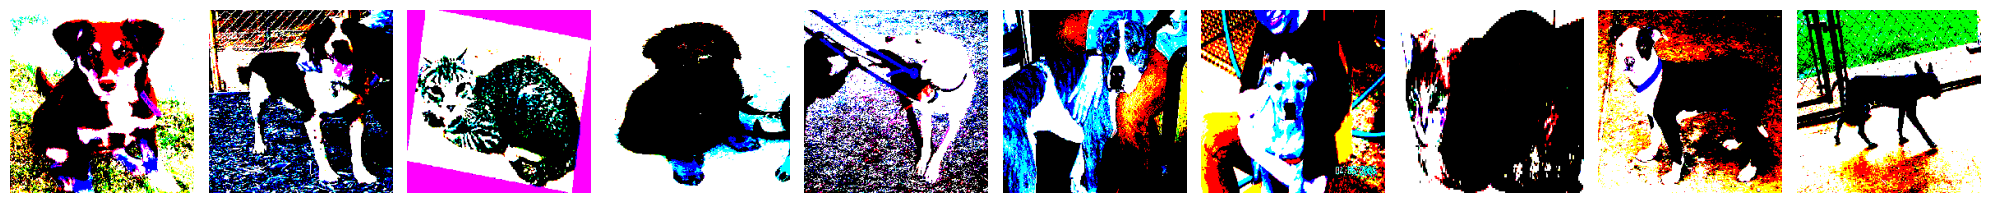

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

the cahge in image is because of the preprocessing done by vgg16 and by us too.

[1, 0] = cat

[0, 1] = dog

Build and train CNN using tensorflow integrated keras API

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the Sequential model
model = Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation, and 'same' padding
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),

    # MaxPooling layer with a 2x2 pool size and strides of 2
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional layer with 64 filters, a 3x3 kernel, 'relu' activation, and 'same' padding
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),

    # MaxPooling layer with a 2x2 pool size and strides of 2
    MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten layer to convert the 2D feature map to a 1D vector
    Flatten(),

    # Fully connected Dense layer with 2 units and 'softmax' activation for binary classification
    Dense(units=2, activation='softmax')
])


Certainly! Here's the updated code with the required imports and an explanation of each module and layer:

Explanation:

1. **TensorFlow Import:**
   - `import tensorflow as tf`: Imports the TensorFlow library.

2. **Sequential Model:**
   - `model = Sequential([...])`: Initializes a Sequential model, which is a linear stack of layers.

3. **Convolutional Layers:**
   - `Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3))`:
     - Convolutional layer with 32 filters, a 3x3 kernel, 'relu' activation, 'same' padding, and an input shape of (224, 224, 3).
   - `Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')`:
     - Convolutional layer with 64 filters, a 3x3 kernel, 'relu' activation, and 'same' padding.

4. **MaxPooling Layers:**
   - `MaxPooling2D(pool_size=(2, 2), strides=2)`:
     - MaxPooling layer with a 2x2 pool size and strides of 2.

5. **Flatten Layer:**
   - `Flatten()`:
     - Flatten layer to convert the 2D feature map to a 1D vector.

6. **Dense Layer:**
   - `Dense(units=2, activation='softmax')`:
     - Fully connected Dense layer with 2 units (for binary classification) and 'softmax' activation.

This code defines a simple convolutional neural network (CNN) for binary image classification. The model takes 224x224 RGB images as input and outputs a probability distribution over the two classes using the softmax activation function.

Bilkul, main explain kar deta hoon:

1. **Filters:**
   - `filters` parameter specifies the number of filters/channels in a convolutional layer. Each filter is responsible for learning different features in the input data. A higher number of filters allows the network to learn more complex features but also increases the computational cost.

2. **Kernel Size:**
   - `kernel_size` parameter defines the size of the convolutional kernel (filter). In the example `kernel_size=(3, 3)`, it means a 3x3 convolutional kernel. This kernel is slid over the input data, and the dot product is computed at each position, capturing local patterns in the data.

3. **Padding:**
   - `padding` parameter determines how the input data is padded before applying convolution.
     - `'valid'` means no padding. The convolutional operation is applied only to the valid part of the input, and the output size is reduced.
     - `'same'` means zero-padding is added to the input data such that the output has the same height and width as the input. It helps preserve spatial dimensions.

4. **Activation:**
   - `activation` parameter specifies the activation function applied to the output of the convolutional layer.
     - `'relu'` (Rectified Linear Unit) is a common activation function that introduces non-linearity by returning the input for positive values and zero for negative values. It helps the model learn complex patterns.

In summary:
- `Filters` and `Kernel Size` determine the capacity of the model to learn features.
- `Padding` affects the spatial dimensions of the output.
- `Activation` introduces non-linearity, allowing the model to learn complex relationships in the data.

These parameters are crucial in designing convolutional layers to extract hierarchical features from the input data in neural networks.

 **n(filter) = n(output channels) = number of features**

Yes, that's correct! In the context of convolutional layers, the terms "filter," "output channels," and "number of features" can be used interchangeably.

Here's a breakdown:

- **Filter:** A filter is a small window (kernel) that slides over the input data during the convolution operation. Each filter is responsible for learning specific features from the input. Jitne number of filters we will ask, utne different features will be learnet by model during the movement of 3*3 window(kernel).

- **Output Channels:** In the context of a convolutional layer, the number of filters used in that layer determines the number of output channels. Each filter produces one channel in the output. The set of all channels forms the output tensor.

- **Number of Features:** The number of features refers to the different patterns or characteristics that the filters are learning to recognize. Each filter learns to detect a particular feature or pattern in the input data.

So, when you set the `filters` parameter in a convolutional layer, you are determining how many different features or patterns the layer should learn from the input. Each filter in the layer is trained to recognize a specific feature, and the collective set of filters forms the output channels of the layer.

In the context of convolutional neural networks (CNNs):

- **Filter:** This term is often used interchangeably with "kernel" or "convolutional kernel." A filter is a small window or matrix that slides over the input data during the convolution operation.

- **Kernel:** In the context of CNNs, especially when dealing with convolutional layers, a kernel is a small matrix that is used for the convolution operation. **It's the weight matrix that is applied to the input data to produce the output feature map.**

So, in practical terms, when you specify the `kernel_size` in a convolutional layer, you are determining the size of the filter or kernel that will be applied to the input data. The terms "filter" and "kernel" are often used interchangeably in the context of CNNs, but the key idea is that they represent the same concept—a small matrix that extracts features from the input.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',  # Assuming you are doing multi-class classification with one-hot encoding
    metrics=['accuracy']
)


In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)
# we are just specifying X, but not specifying y, which is our target data, because when data is stored as a generator, generator itself actually contains corresponding labels. So we don't need to mention y.

Epoch 1/10
100/100 - 9s - loss: 16.1857 - accuracy: 0.5470 - val_loss: 8.1532 - val_accuracy: 0.5550 - 9s/epoch - 85ms/step
Epoch 2/10
100/100 - 3s - loss: 1.5577 - accuracy: 0.7810 - val_loss: 2.6034 - val_accuracy: 0.5600 - 3s/epoch - 31ms/step
Epoch 3/10
100/100 - 3s - loss: 0.3663 - accuracy: 0.9040 - val_loss: 2.2090 - val_accuracy: 0.6250 - 3s/epoch - 29ms/step
Epoch 4/10
100/100 - 6s - loss: 0.0806 - accuracy: 0.9700 - val_loss: 1.7417 - val_accuracy: 0.6250 - 6s/epoch - 62ms/step
Epoch 5/10
100/100 - 3s - loss: 0.0136 - accuracy: 0.9980 - val_loss: 2.0290 - val_accuracy: 0.6400 - 3s/epoch - 29ms/step
Epoch 6/10
100/100 - 4s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8109 - val_accuracy: 0.6100 - 4s/epoch - 37ms/step
Epoch 7/10
100/100 - 4s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.7842 - val_accuracy: 0.6200 - 4s/epoch - 43ms/step
Epoch 8/10
100/100 - 3s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.7795 - val_accuracy: 0.6200 - 3s/epoch - 29ms/step
Epoch 9/10
100/

**Clearly there is huge difference in accuracy of training and validation datasets. Hence the model is not generalizing well. We will improve it by fine turning later in the same video. But let's use our model for inferences.**

Using this model for predictions, trained on cats - dogs data. Prediction on our test set.

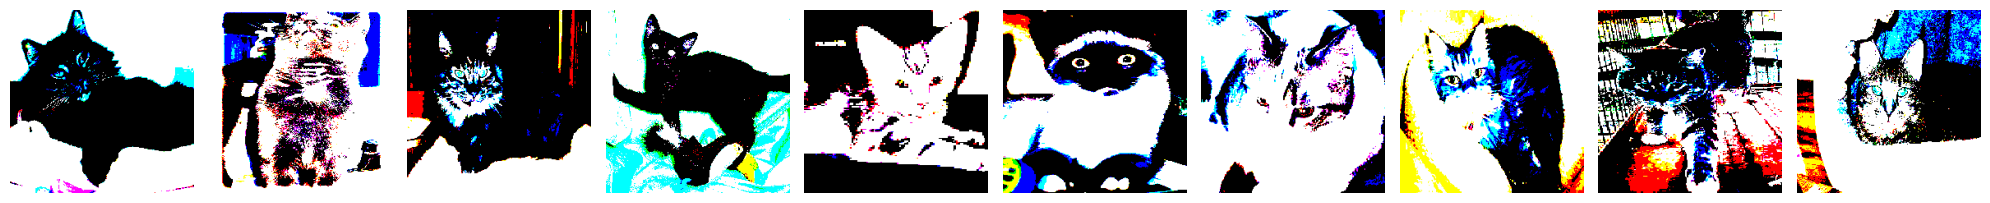

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

Recall , we have not shuffled the test dataset, as it is not required.

Also color distortion is because of vgg16 preprocessing step, in which internally we have subtracted th mean of all the red channel pixels, from each red pixel of r-channel of an image. Similarly for all images, for all colors, each pixel = that pixel - mean of that color of all images.

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
predictions = model.predict(x=test_batches, verbose=1)

10/10 [==============================] - 1s 36ms/step


In [ ]:
import numpy as np
np.round(predictions)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In the NumPy library, the function `np.argmax` is used to find the indices of the maximum values along a specified axis. The `axis` parameter determines the axis along which the operation is performed.

In the context of your code snippet:

```python
np.argmax(predictions, axis=-1)
```

The `axis=-1` means that the `argmax` operation is applied along the last axis of the array `predictions`. The negative index `-1` is a shorthand in NumPy to refer to the last axis of an array. If `axis` is not specified or set to `None`, the operation will be applied to the flattened array (i.e., the array is treated as one-dimensional).

For example, if `predictions` is a 2D array, specifying `axis=-1` will find the index of the maximum value along each row. If `predictions` is a 3D array, it will find the index of the maximum value along the last dimension.

Here's a brief illustration:

```python
import numpy as np

# Example 2D array
predictions_2d = np.array([[1, 2, 3],
                           [4, 5, 6]])

# Finding the index of the maximum value along the last axis (axis=-1, the second axis in this case)
max_indices_2d = np.argmax(predictions_2d, axis=-1)
print(max_indices_2d)
# Output: [2, 2]

# Example 3D array
predictions_3d = np.array([[[1, 2, 3],
                            [4, 5, 6]],
                           
                           [[7, 8, 9],
                            [10, 11, 12]]])

# Finding the index of the maximum value along the last axis (axis=-1, the third axis in this case)
max_indices_3d = np.argmax(predictions_3d, axis=-1)
print(max_indices_3d)
# Output:
# [[2, 2],
#  [2, 2]]
```

In both examples, `axis=-1` is used to find the indices of the maximum values along the last axis of the arrays.

If you don't specify the `axis` parameter or if you set it to `None` in the `np.argmax` function, the operation will be applied to the flattened array. This means that the array is treated as one-dimensional, and the index of the maximum value in the flattened array will be returned.

Here's an example to illustrate this:

```python
import numpy as np

# Example 2D array
predictions_2d = np.array([[1, 2, 3],
                           [4, 5, 6]])

# Without specifying axis (or setting it to None), the array is flattened
max_index_flattened = np.argmax(predictions_2d)
print(max_index_flattened)
# Output: 5

# Example 3D array
predictions_3d = np.array([[[1, 2, 3],
                            [4, 5, 6]],
                           
                           [[7, 8, 9],
                            [10, 11, 12]]])

# Without specifying axis (or setting it to None), the 3D array is flattened
max_index_flattened_3d = np.argmax(predictions_3d)
print(max_index_flattened_3d)
# Output: 11
```

In both examples, the absence of the `axis` parameter (or setting it to `None`) results in the flattening of the array, and the index of the maximum value in the flattened array is returned. This behavior is different from specifying `axis=-1`, where the operation is applied along the last axis of the array.

In [ ]:
cm

array([[30, 20],
       [14, 36]])

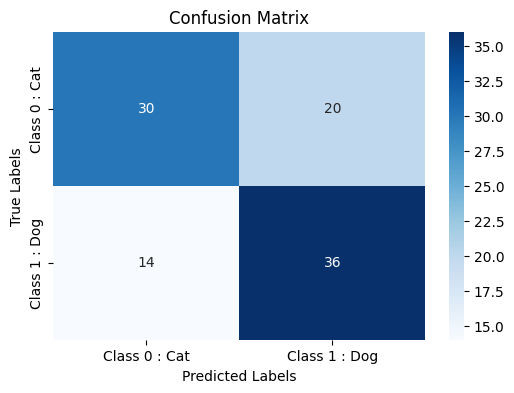

In [ ]:
# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 : Cat', 'Class 1 : Dog'], yticklabels=['Class 0 : Cat', 'Class 1 : Dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Principal Diagonal = Correct predictions,  baki sb error predictions

# Pretrained vgg16 ka use krke, cat and dog images classification, fine tuning later

Fine tune a pre-trained model (vgg16) to classify images of cats and dogs ( images of our interest ) .

Here fine-tune = making such that not classify one of the 1000 categories, but fine tune to classify 1 of the two categories only : cat or dog.

Cat and Dog were included in the image net library for which vgg16 was trained on. Because of this, we won't have to do much tuning to change the model from classifying 1000 classes to only 2 cat and dog classes. So tuning will be very minimal.

In [ ]:
# downloading the model from the internet
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Much more complex model.

In [ ]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [ ]:
# converting original vgg16_model inr=to a sequential model

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[ : -1]: # every layer except the last/output layer, sb dal do sequential me
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

* last layer chhorkar sbkuch hai. ( i mean each other layer )

In [ ]:
for layer in model.layers:
  layer.trainable = False  # freeze the trainable parameters(weights and biases), so that dobara train na ho or vo weights and biases change na hon. Since vgg16 has already learnt the features of cats and dogs

In [ ]:
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

We only need to retrain this output layer to classify 2 output layers.

**Training this modified model(fine-tuned vgg16 model) on our images of cats and dogs.**

In [ ]:
# first compile to get ready for training
model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 10s - loss: 0.2728 - accuracy: 0.8830 - val_loss: 0.0790 - val_accuracy: 0.9800 - 10s/epoch - 104ms/step
Epoch 2/5
100/100 - 6s - loss: 0.0743 - accuracy: 0.9760 - val_loss: 0.0592 - val_accuracy: 0.9800 - 6s/epoch - 63ms/step
Epoch 3/5
100/100 - 6s - loss: 0.0504 - accuracy: 0.9860 - val_loss: 0.0485 - val_accuracy: 0.9900 - 6s/epoch - 64ms/step
Epoch 4/5
100/100 - 6s - loss: 0.0369 - accuracy: 0.9870 - val_loss: 0.0431 - val_accuracy: 0.9900 - 6s/epoch - 64ms/step
Epoch 5/5
100/100 - 7s - loss: 0.0278 - accuracy: 0.9930 - val_loss: 0.0403 - val_accuracy: 0.9900 - 7s/epoch - 67ms/step


God accuracy. Even in first epoch val_acc > training_acc , because the vgg16 model was already trained on dogs and cats images.

finally after last epoch, val_acc increase from 97 to 99, because the model is not trained on initial cat+dog images as well as the images we have provided.

**using this fine-tuned(modified) vgg16 model for inference. i.e. test predictions.**

In [ ]:
predictions = model.predict(x=test_batches, verbose = 1)

10/10 [==============================] - 1s 87ms/step


In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
# test me shuffling nhi, taki exact one-to-onr match of labels bana rhe

In [42]:
cm

array([[48,  2],
       [ 1, 49]])

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

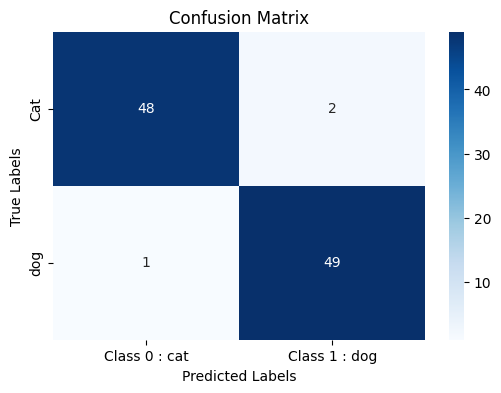

In [44]:
# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0 : cat', 'Class 1 : dog'], yticklabels=['Cat', 'dog'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

 = 97 correct predictions out of 100 datasets

Since in the original vgg16 model, cat and dog data was already included. Hence model was already trained for the cat and dog images. We even could have skipped the re-training, the model even in that scenario, would have been predicting the correct output. :  Very less fine tuning just for output classes ke number change krne ke liye.

But More fine tuning required, when the output classes, were not laready pre-trained in the vgg16 models. This time/ next part we are going to use completly new dataset(means unknown classes for the model before the fine-tuning and re-training), that was not included in the original dataset.